# 회귀 신경망 빌딩 연습

In [ ]:
# 모형 저장 및 불러오는 코드

# model.save('cnn_model2.h5')

# from tensorflow.keras.models import load_model
# cnn_model2 = load_model('cnn_model2.h5')

# Data and libraries

일관된 결과를 위해 random seed를 0으로 고정한다.


In [1]:
import numpy as np
import tensorflow as tf

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
import keras

# version check
print(np.__version__)
print(tf.__version__)
print(keras.__version__)

1.22.4
2.9.1
2.9.0


In [3]:
# data load

from sklearn import datasets
raw_boston = datasets.load_boston()

/Users/Angela/opt/anaconda3/envs/py3_8_5/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Ca

In [ ]:
# # 오류때문에 때로 가져오기로 한다.

# import pandas as pd
# import numpy as np

# data_url = "http://lib.stat.cmu.edu/datasets/boston"
# raw_boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_boston.values[::2, :], raw_boston.values[1::2, :2]])
# target = raw_boston.values[1::2, 2]

# feature and target

In [4]:
X = raw_boston.data
y = raw_boston.target

## feature dimension 

In [5]:
print(X.shape)

(506, 13)


## target data classes

타깃 데이터 종류를 확인하는 것으로 분류 문제인지 회귀 문제인지 구분할 수 있다. 연속형 숫자이기 때문에 회귀문제로 해결해야 함을 알 수 있다.

In [6]:
print(set(y))

{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 37.6, 37.3, 13.9, 13.4, 14.4, 14.9, 15.4, 8.5, 41.7, 42.8, 43.1, 43.5, 45.4, 9.5, 8.3, 8.7, 9.7, 10.8, 11.3, 11.7, 12.3, 12.8, 13.2, 13.

## Split Training and Test Data

In [7]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# Building Perceptron (오류 및 해결 포함)

In [8]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [9]:
from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 13개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model = Sequential()                # 초기 모형 생성.
model.add(Dense(20, input_dim = n_feat, activation = 'relu')) # add로 입력층 추가, *input_dim = 피처 개수, 20은 output 차원, 활성화 함수를 한 줄에 넣음.
model.add(Dense(1))                 # 최종 아웃풋 층. 회귀문제로 1개의 노드로 출력되도록 한다. 
                                    # 회귀때 최종 활성화 함수를 선형 함수를 사용해야 하는데, 코드에서 지정하지 않으면 선형 함수가 적용된다.

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                280       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## model compile

In [11]:
model.compile(loss = 'mean_squared_error',         # 손실함수: 회귀 문제이기 때문에 MSE를 사용
              optimizer = 'adam',                  # 옵티마이저와 평가 기준
              metrics = ['mean_squared_error'])

## model learning

In [12]:
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 5)  # batch_size: learning mini batch size at one ephoch

Epoch 1/30
76/76 [==============================] - 1s 3ms/step - loss: 474.8179 - mean_squared_error: 474.8179
Epoch 2/30
76/76 [==============================] - 0s 2ms/step - loss: 97.4737 - mean_squared_error: 97.4737
Epoch 3/30
76/76 [==============================] - 0s 2ms/step - loss: 81.1661 - mean_squared_error: 81.1661
Epoch 4/30
76/76 [==============================] - 0s 2ms/step - loss: 72.6059 - mean_squared_error: 72.6059
Epoch 5/30
76/76 [==============================] - 0s 3ms/step - loss: 63.1071 - mean_squared_error: 63.1071
Epoch 6/30
76/76 [==============================] - 0s 3ms/step - loss: 57.3056 - mean_squared_error: 57.3056
Epoch 7/30
76/76 [==============================] - 0s 3ms/step - loss: 53.3248 - mean_squared_error: 53.3248
Epoch 8/30
76/76 [==============================] - 0s 2ms/step - loss: 48.0305 - mean_squared_error: 48.0305
Epoch 9/30
76/76 [==============================] - 0s 2ms/step - loss: 44.4123 - mean_squared_error: 44.4123
Epoch 10

# evaluation

MSE를 사용하기로 했기 때문에 MSE가 출력된다.

In [13]:
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

12/12 [==============================] - 0s 2ms/step - loss: 51.5557 - mean_squared_error: 51.5557
51.55571365356445
4/4 [==============================] - 0s 2ms/step - loss: 73.9725 - mean_squared_error: 73.9725
73.97251892089844


~~나 뭐 잘못했냐 뭐가 이렇게 에러가 커...~~

## MSE and loss rate

epoch 별로 그래프를 그리기 쉬워지도록 범위설정하는 arange 함수를 사용한다.

In [14]:
import numpy as np
epoch = np.arange(1, epo +1)               # x축 설정
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [15]:
mse = hist.history['mean_squared_error']   # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 정확도를 알 수 있다.
print(mse)

[474.81793212890625, 97.47374725341797, 81.16606903076172, 72.60585021972656, 63.10710144042969, 57.30558776855469, 53.324832916259766, 48.03047561645508, 44.41233444213867, 44.62455749511719, 39.8853874206543, 37.46774673461914, 37.2100830078125, 34.65799331665039, 35.224021911621094, 37.256954193115234, 36.62009811401367, 35.41062545776367, 33.9078254699707, 34.47385025024414, 36.57753372192383, 35.87947082519531, 34.44246292114258, 35.378902435302734, 33.26034927368164, 36.97323989868164, 31.00062370300293, 34.85821533203125, 32.477012634277344, 31.690677642822266]


In [16]:
loss = hist.history['loss']                # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 손실정도를 알 수 있다.
print(loss)

[474.81793212890625, 97.47374725341797, 81.16606903076172, 72.60585021972656, 63.10710144042969, 57.30558776855469, 53.324832916259766, 48.03047561645508, 44.41233444213867, 44.62455749511719, 39.8853874206543, 37.46774673461914, 37.2100830078125, 34.65799331665039, 35.224021911621094, 37.256954193115234, 36.62009811401367, 35.41062545776367, 33.9078254699707, 34.47385025024414, 36.57753372192383, 35.87947082519531, 34.44246292114258, 35.378902435302734, 33.26034927368164, 36.97323989868164, 31.00062370300293, 34.85821533203125, 32.477012634277344, 31.690677642822266]


## MSE and loss rate visualization

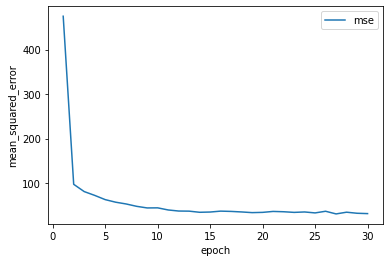

In [17]:
import matplotlib.pyplot as plt

plt.plot(epoch, mse, label = 'mse')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()

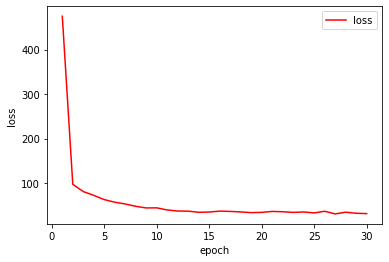

In [18]:
plt.plot(epoch, loss, 'r', label = 'loss')    # plot color = r[ed]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# Predicted Data and Real Data

## to DataFrame

In [19]:
# predict 메소드로 테스트 데이터를 넣고 예측값을 구한다. flatten 메소드로 예측값을 펼친다.(DataFrame 만들것)

pred_y = model.predict(X_te).flatten()
print(pred_y)

4/4 [==============================] - 0s 2ms/step
[14.926881  17.681875  26.267515   7.9176764 15.0052    20.334705
 11.632047  22.128708  13.236688   7.8890967  5.115804   9.61794
 10.792638   2.5619786 33.263218  22.72698   13.689977  29.558813
 24.67592   21.299353  22.89377   17.086302  16.023752  26.365973
 21.47994   10.689092  17.379763  11.004308  28.347002  15.011777
 10.714314  12.8569765 17.735563  20.255533  24.823124  12.987615
  4.1403937 16.951498   6.4117637  6.4220023 22.591543  18.943974
 12.945657   9.773435  17.008005  23.849712  16.264502  14.620763
  7.6369376 20.45455    7.750219  11.073197  18.99208   22.401697
  7.7652946 15.407407  17.322506  10.068269  14.971913  18.07519
 16.162962  18.721228  24.99948   24.195616   9.034818  24.184473
 11.682683  13.969041   8.437718  20.768143  15.780793  17.593191
 26.882402  23.865873  16.954931  -1.2630565 27.122025  20.394756
 23.056814  16.387426  22.719778  17.16751   14.822972  28.526934
 28.235544  21.928003  20.2

In [20]:
import pandas as pd

# pred_y와 real_val을 한 데이터 프레임에 넣기
res_df = pd.DataFrame(pred_y, columns = ['predict_val'])
res_df['real_val'] = y_te
res_df.head(3)

,predict_val,real_val
0,14.926881,22.6
1,17.681875,50.0
2,26.267515,23.0


In [21]:
# 예쁘게 시각화를 위해 오름차순 되도록 해둔다.

df_sort = res_df.sort_values(['predict_val'], ascending = True)
df_sort.head(3)

,predict_val,real_val
116,-3.866297,8.4
96,-3.027377,13.8
75,-1.263057,7.4


## Predicted Data and Real Data visualization


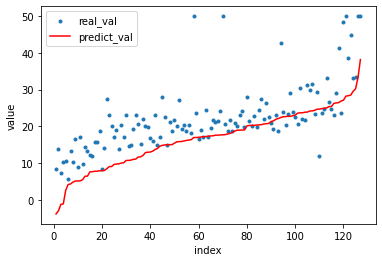

In [22]:
import matplotlib.pyplot as plt
import numpy as np

idx = np.arange(1, len(df_sort)+1)    # x축 생성
plt.scatter(idx, df_sort['real_val'], marker = '.', label = 'real_val')
plt.plot(idx, df_sort['predict_val'], color = 'r', label = 'predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

시각화를 하니 전체적으로 예측값이 더 아래쪽에 있는 것을 확인할 수 있다. 결과가 딱히 좋은 것 같지 않은데, 아무래도 보스턴 집값 데이터에 결측치가 많아서 그러지 않을까 생각이 든다.

그래도 제대로 값이 있으면 그것이 예외적인 값이더라도 값이 있는 것 자체로서 역할을 할 텐데 말이다. 데이터 전처리도 열심히 공부해야지...

# Whole code

활성화 함수를 reLu 에서 선형함수로 바꾸었다. 항등함수(identity function)가 linear function으로 불리우기도 한다.

물론 최종 출력층에서 회귀문제는 자동으로 선형이 지정된다고는 하지만 어떤 결과가 나올지 궁금하기도 하니까 말이다.

boston 집값 데이터가 사라질 것을 대비하여 데려오는 방식을 달리해두었다. 

numpy version: 1.22.4
pandas version: 1.22.4
tensorflow version: 2.9.1
keras version: 2.9.0
-- X and target shape checking --
(506, 13)
{5.0, 6.3, 7.2, 8.8, 7.4, 10.2, 11.8, 12.7, 13.6, 14.5, 15.0, 16.5, 17.5, 18.9, 18.2, 20.4, 21.6, 22.9, 21.7, 24.0, 19.9, 26.6, 26.5, 27.5, 23.1, 27.1, 28.7, 24.7, 30.8, 33.4, 34.7, 34.9, 36.2, 35.4, 31.6, 33.0, 38.7, 33.2, 43.8, 41.3, 37.2, 39.8, 42.3, 48.5, 44.8, 50.0, 46.7, 48.3, 44.0, 48.8, 46.0, 10.5, 11.5, 11.0, 12.5, 12.0, 13.5, 13.0, 14.0, 16.6, 16.0, 16.1, 16.4, 17.4, 17.1, 17.0, 17.6, 17.9, 18.4, 18.6, 18.5, 18.0, 18.1, 19.6, 19.4, 19.5, 19.1, 19.0, 20.0, 20.5, 20.9, 20.6, 20.1, 21.0, 21.4, 21.5, 21.9, 21.1, 22.0, 22.5, 22.6, 22.4, 22.1, 23.4, 23.5, 23.9, 23.6, 23.0, 24.1, 24.6, 24.4, 24.5, 25.0, 25.1, 26.4, 27.0, 27.9, 28.0, 28.4, 28.1, 28.5, 28.6, 29.4, 29.9, 29.6, 29.1, 29.0, 30.5, 30.1, 31.1, 31.5, 31.0, 32.5, 32.0, 32.9, 32.4, 32.2, 33.3, 33.8, 33.1, 32.7, 8.4, 34.6, 35.2, 35.1, 10.4, 10.9, 7.0, 36.4, 36.0, 36.5, 36.1, 11.9, 37.9, 37.0, 

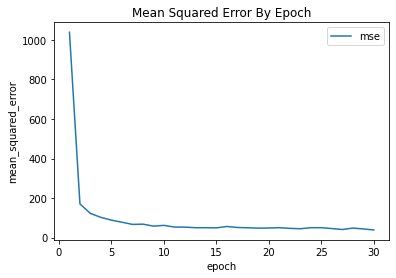

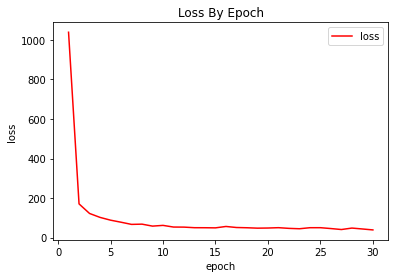

4/4 [==============================] - 0s 2ms/step
[17.546146  21.324326  25.596344  11.973274  17.773413  22.008728
 15.8821945 22.688122  13.751551  14.430351  -2.0090337  4.0273128
 14.335014   5.299743  32.297173  26.064701  18.155884  30.60875
 22.281725  20.383282  23.37143   19.358223  20.238998  24.710371
 18.378853   8.401367  21.504822  14.397793  30.112095  18.325733
 15.209343  17.124054  24.915886  22.569159  24.654053  17.91735
  8.248566  21.550095   6.5854335  9.071342  17.403725  15.653912
 17.40197   13.334679  21.601307  24.629303  15.764397  18.616467
  7.145248  24.160725  10.760216  11.247995  20.136274  26.076372
 14.023716  15.107706  18.510908  17.457174   6.635299  20.66544
 23.234985  19.007082  24.259405  21.948929  13.096474  25.014786
 16.10572   18.096516   9.284836  16.552284  19.76669   19.27927
 27.587917  27.21102   21.959167   2.2423244 29.179226  20.11499
 23.313839  18.240698  24.292994  20.612673  17.455246  29.97109
 30.65112   21.663437  21.4789

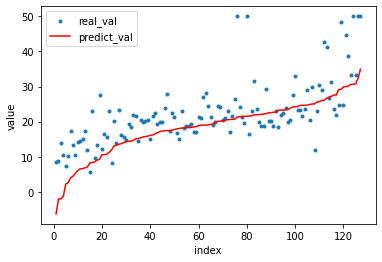

In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

np.random.seed(0)
tf.random.set_seed(0)

# version check
print("numpy version:", np.__version__)
print("pandas version:", np.__version__)
print("tensorflow version:", tf.__version__)
print("keras version:", keras.__version__)

# data load
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
# data = np.hstack([raw_boston.values[::2, :], raw_boston.values[1::2, :2]])
# target = raw_boston.values[1::2, 2]
X = np.hstack([raw_boston.values[::2, :], raw_boston.values[1::2, :2]])
y = raw_boston.values[1::2, 2]

# checking the feature dimension and target data
print("-- X and target shape checking --")
print(X.shape)
print(set(y))

# split Training and Test Data
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

# building model
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 13개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model = Sequential()                # 초기 모형 생성.
model.add(Dense(20, input_dim = n_feat, activation = 'linear')) # add로 입력층 추가, *input_dim = 피처 개수, 20은 output 차원, 활성화 함수를 한 줄에 넣음.
model.add(Dense(1))                 # 최종 아웃풋 층. 회귀문제로 1개의 노드로 출력되도록 한다. 
                                    # 회귀때 최종 활성화 함수를 선형 함수를 사용해야 하는데, 코드에서 지정하지 않으면 선형 함수가 적용된다.

# model checking
print("-- model summary --")
model.summary()

# compile
model.compile(loss = 'mean_squared_error',         # 손실함수: 회귀 문제이기 때문에 MSE를 사용
              optimizer = 'adam',                  # 옵티마이저와 평가 기준
              metrics = ['mean_squared_error'])

# learning
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 5)  # batch_size: learning mini batch size at one ephoch

# evaluation by MSE value
print("-- model evaluate with train data by MSE value --")
print(model.evaluate(X_tn, y_tn)[1])
print("-- model evaluate with test data by MSE value --")
print(model.evaluate(X_te, y_te)[1])

# MSE and loss for dataframe
epoch = np.arange(1, epo +1)                   # x축 설정
# print(epoch)
mse = hist.history['mean_squared_error']       # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 정확도를 알 수 있다.
# print(mse)
loss = hist.history['loss']                    # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 손실정도를 알 수 있다.
# print(loss)

# MSE and loss rate visualization
import matplotlib.pyplot as plt

plt.plot(epoch, mse, label = 'mse')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.title("Mean Squared Error By Epoch")
plt.show()

plt.plot(epoch, loss, 'r', label = 'loss')    # plot color = r[ed]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title("Loss By Epoch")
plt.show()

# Predicted Data and Real Data check
# predict 메소드로 테스트 데이터를 넣고 예측값을 구한다. flatten 메소드로 예측값을 펼친다.(DataFrame 만들것)
pred_y = model.predict(X_te).flatten()
print(pred_y)
# pred_y와 real_val을 한 데이터 프레임에 넣기
res_df = pd.DataFrame(pred_y, columns = ['predict_val'])
res_df['real_val'] = y_te
# res_df.head(3)
# sorting values for visualization
df_sort = res_df.sort_values(['predict_val'], ascending = True)
# df_sort.head(3)

# Predicted Data and Real Data visualization
idx = np.arange(1, len(df_sort)+1)             # x축 생성
plt.scatter(idx, df_sort['real_val'], marker = '.', label = 'real_val')
plt.plot(idx, df_sort['predict_val'], color = 'r', label = 'predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

```
previous MSE and loss
 
 12/12 [==============================] - 0s 2ms/step - loss: 51.5557 - mean_squared_error: 51.5557
51.55571365356445
4/4 [==============================] - 0s 2ms/step - loss: 73.9725 - mean_squared_error: 73.9725
73.97251892089844

 this(linear) MSE and loss
 
12/12 [==============================] - 0s 3ms/step - loss: 44.8637 - mean_squared_error: 44.8637
44.8636589050293
4/4 [==============================] - 0s 2ms/step - loss: 60.2318 - mean_squared_error: 60.2318
60.231815338134766

```

MSE도 줄어들고 loss도 많이 줄어들었다. 물론 그래프로 시각화한 결과는 그닥 마음에 드는 결과는 아니다. 그래프로만 보아도 분석하기에 어려운 outlier가 존재하는 것으로 예상된다.

아래는, 중간에 활성화 함수 파라미터 적는 것좀 찾아보기 위해 검색하다 닿은 블로그 참조하였다.: https://muzukphysics.tistory.com/165

 아무튼, ReLU를 선호하는 이유가 있을 것이라고 생각된다. 시그모이드는 그래디언트 소실문제, 그를 보완할 수 있는 하이퍼볼릭 탄젠트도 그래디언트 소실문제를 막을 수는 없다는 것, 렐루는 그래디언트 소실 문제가 발생하지 않고 학습속도가 빠르지만(하이퍼볼릭 탄젠트 대비 약 6배) 음수를 데이터로 받을 경우 항상 0이기 때문에 학습능력이 떨어진다는 점, 그 음수에 관련한 문제를 보완한 것이 리키렐루. 소프트맥스는 출력값들의 합이 항상 1이 되도록 한다는 점에서 출력 노드의 활성화 함수로 많이 사용된다.
 
 
 